In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

Ref - https://www.kaggle.com/budincsevity/szeged-weather

In [2]:
# import data
df = pd.read_csv('weatherHistory.csv')
df.columns = ['time', 'summary', 'precipType', 'temperature', 'apparentTemperature', 'humidity', 'windSpeed', 'windBearing', 'visibility', 'cloudCover', 'pressure', 'summary']
df.head()

,time,summary,precipType,temperature,apparentTemperature,humidity,windSpeed,windBearing,visibility,cloudCover,pressure,summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# EDA

In [3]:
# drop duplicates, if any
df.drop_duplicates(inplace=True)

In [4]:
# summary statistics
df.describe(include='all')

,time,summary,precipType,temperature,apparentTemperature,humidity,windSpeed,windBearing,visibility,cloudCover,pressure,summary
count,96429,96429,95912,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.0,96429.000000,96429
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2012-10-07 14:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,1,31726,85200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.929692,10.851707,0.734902,10.812460,187.497506,10.347225,0.0,1003.232915,NaN
std,NaN,NaN,NaN,9.550492,10.695743,0.195466,6.913345,107.376423,4.192548,0.0,116.984300,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.683333,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


In [5]:
df.nunique()

time                   96429
summary                   27
precipType                 2
temperature             7574
apparentTemperature     8984
humidity                  90
windSpeed               2484
windBearing              360
visibility               949
cloudCover                 1
pressure                4979
summary                  214
dtype: int64

In [6]:
# df['summary'] uniques (use iloc because summary uses df.summary() instead)
df.iloc[:, 1].value_counts()

Partly Cloudy                          31726
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10873
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [7]:
# precipType uniques
df['precipType'].unique()

array(['rain', 'snow', nan], dtype=object)

In [8]:
# drop unnecessary variables
df.drop(['summary', 'cloudCover'], axis = 1, inplace=True)
df.head()

,time,precipType,temperature,apparentTemperature,humidity,windSpeed,windBearing,visibility,pressure
0,2006-04-01 00:00:00.000 +0200,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


# Feature Engineering and/or Transformation

## Target variable

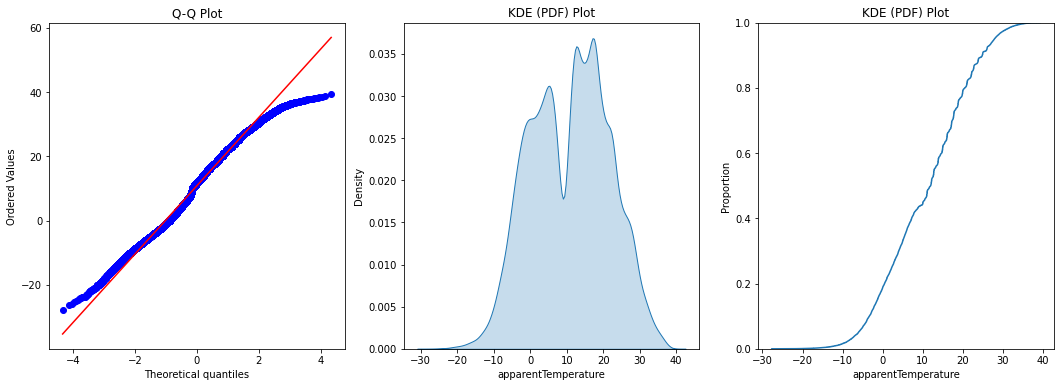

In [9]:
# pdf, cdf and qq plot
def prob_plots(x):
    from scipy.stats import probplot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))

    res = probplot(x, plot = ax[0])
    ax[0].set_title("Q-Q Plot")

    ax[1] = sns.kdeplot(x, fill = True, ax = ax[1])
    ax[1].set_title("KDE (PDF) Plot")

    ax[2] = sns.ecdfplot(x, ax = ax[2])
    ax[2].set_title("KDE (PDF) Plot")

prob_plots(df['apparentTemperature'])

Keep target variable as is. No transformations needed.

## Correlation

<AxesSubplot:>

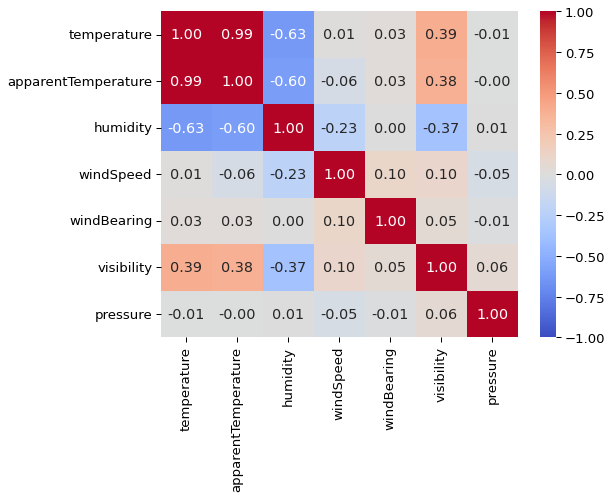

In [10]:
# correlation plot
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

df_corr = df.corr()

sns.heatmap(df_corr, annot=True, cmap = 'coolwarm', vmin = -1, vmax = 1, fmt = '.2f')

We can see that `windSpeed`, `windBearing`, `pressure`, `visibility` has no effect on `apparentTemperature`.

In [11]:
# drop those variables
df.drop(['windSpeed', 'windBearing', 'pressure', 'visibility'], axis = 1, inplace=True)
df.head()

,time,precipType,temperature,apparentTemperature,humidity
0,2006-04-01 00:00:00.000 +0200,rain,9.472222,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,rain,9.355556,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,rain,9.377778,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,rain,8.288889,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,rain,8.755556,6.977778,0.83


## Checking effect of categorical variables

In [12]:
# ANOVA for precipType
# get different groups
df['precipType'] = df['precipType'].fillna('None')

x = []
for e in df['precipType'].unique():
    x.append(np.array(df['apparentTemperature'].loc[df['precipType'] == e]))

[e.mean() for e in x]

[13.010274191444967, -6.249847004397975, 9.462841177734795]

In [13]:
# One Way ANOVA
from scipy.stats import f_oneway

F, p = f_oneway(x[0], x[1], x[2])
print("F Statistic =", format(F, ".2f"))
print("p-Value =", format(p, '.3'))

F Statistic = 22696.42
p-Value = 0.0


Since p < 0.05, we can consider that there is a statistically significant relationship between `precipType` and `apparentTemperature`.

In [14]:
# ANOVA for time variable
# we can use time as hours from midnight to see if there is relationship between that and apparentTemprerature
df['time'] = pd.to_datetime(df['time'], format = '%Y-%m-%d %H:%M:%S.%f %z')
df['hour'] = [e.hour for e in df['time']]
df.head()

,time,precipType,temperature,apparentTemperature,humidity,hour
0,2006-04-01 00:00:00+02:00,rain,9.472222,7.388889,0.89,0
1,2006-04-01 01:00:00+02:00,rain,9.355556,7.227778,0.86,1
2,2006-04-01 02:00:00+02:00,rain,9.377778,9.377778,0.89,2
3,2006-04-01 03:00:00+02:00,rain,8.288889,5.944444,0.83,3
4,2006-04-01 04:00:00+02:00,rain,8.755556,6.977778,0.83,4


<AxesSubplot:xlabel='hour', ylabel='apparentTemperature'>

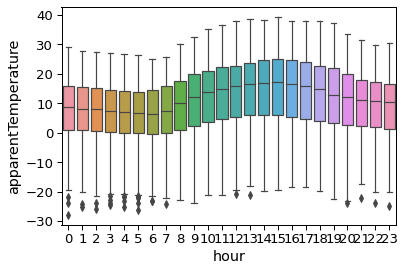

In [15]:
sns.boxplot(y = df['apparentTemperature'], x = df['hour'])

In [16]:
# get groups for one way anova
x = []

for e in df['hour'].unique():
    x.append(np.array(df['apparentTemperature'].loc[df['hour'] == e]))

[e.mean() for e in x]

[8.320862722319033,
 7.92420546012779,
 7.56169612480292,
 7.088489298158287,
 6.78279132791328,
 6.54264282948952,
 6.6282022565123615,
 7.656526187710856,
 9.16585089320281,
 10.865853658536585,
 12.395579613959406,
 13.611010176428296,
 14.534165698799846,
 15.14348902162491,
 15.429362314031303,
 15.456540014379737,
 15.12844560588463,
 14.489266356949285,
 13.583206127979647,
 12.486465073834413,
 11.158540733366516,
 10.012390077982412,
 9.53394585476467,
 8.939271887616837]

In [17]:
# one way anova
F, p = f_oneway(x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8], x[9], x[10], x[11], x[12], x[13], x[14], x[15], x[16], x[17], x[18], x[19], x[20], x[21], x[22], x[23])
print("F Statistic =", format(F, ".2f"))
print("p-Value =", format(p, '.3'))

F Statistic = 397.76
p-Value = 0.0


Since p < 0.05, we can consider that there is a statistically significant relationship between `hour` and `apparentTemperature`.

In [18]:
df['hour'] = df['hour'].astype('object')
df.dtypes

time                    object
precipType              object
temperature            float64
apparentTemperature    float64
humidity               float64
hour                    object
dtype: object

## Univariate Analysis

### Checking for outliers

Outliers massively affect regression models and thus have to be dealt with before using the data for model generation.

In [19]:
# function to get outliers and fix them
def outlier_fix(x):
    import numpy as np
    import pandas as pd
    
    # we will use values > 1.5(IQR) as outliers and equate them to the 90th/10th percentile values 
    
    iqr = np.subtract(*np.percentile(x, [75, 25]))
    iqr_upper_bound = 1.5*iqr + np.percentile(x, 75)
    iqr_lower_bound = np.percentile(x, 25) - 1.5*iqr
    upper_replacement = np.percentile(x, 90)
    lower_replacement = np.percentile(x, 10)
    print("IQR =", iqr)
    print("Upper, Lower Bound for Outliers =", iqr_upper_bound, ",", iqr_lower_bound)
    print("Values to replace outliers with =", upper_replacement, ",", lower_replacement)
    
    return iqr, iqr_upper_bound, iqr_lower_bound, upper_replacement, lower_replacement

iqr, iqr_upper_bound, iqr_lower_bound, upper_replacement, lower_replacement = outlier_fix(df['temperature'])

IQR = 14.155555555555555
Upper, Lower Bound for Outliers = 40.07222222222222 , -16.55
Values to replace outliers with = 24.90555555555555 , -0.127777777777778


<AxesSubplot:xlabel='temperature'>

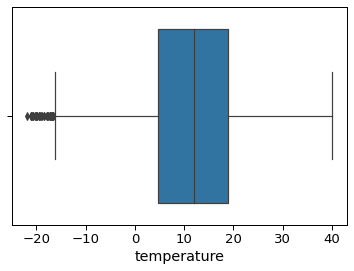

In [20]:
# boxplot before
sns.boxplot(x = 'temperature', data = df)

IQR = 14.155555555555555
Upper, Lower Bound for Outliers = 40.07222222222222 , -16.55
Values to replace outliers with = 24.90555555555555 , -0.127777777777778


<AxesSubplot:xlabel='temperature'>

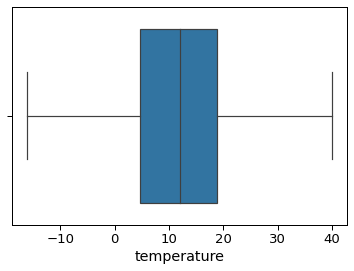

In [21]:
# fixing outliers
iqr, iqr_upper_bound, iqr_lower_bound, upper_replacement, lower_replacement = outlier_fix(df['temperature'])
df.loc[df['temperature'] > iqr_upper_bound, 'temperature'] = upper_replacement
df.loc[df['temperature'] < iqr_lower_bound, 'temperature'] = lower_replacement

# box plot after
sns.boxplot(x = 'temperature', data = df)

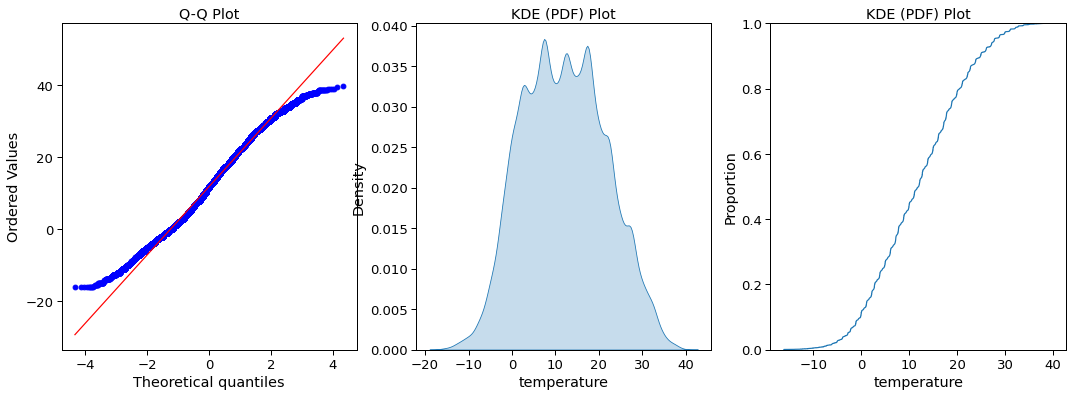

In [22]:
# temperature
prob_plots(df['temperature'])

<AxesSubplot:xlabel='humidity'>

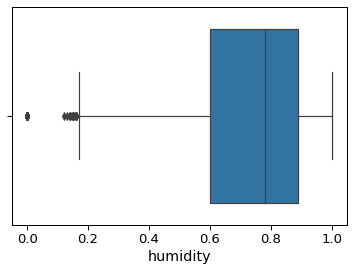

In [23]:
# boxplot before
sns.boxplot(x = 'humidity', data = df)

IQR = 0.29000000000000004
Upper, Lower Bound for Outliers = 1.3250000000000002 , 0.16499999999999992
Values to replace outliers with = 0.95 , 0.43


<AxesSubplot:xlabel='humidity'>

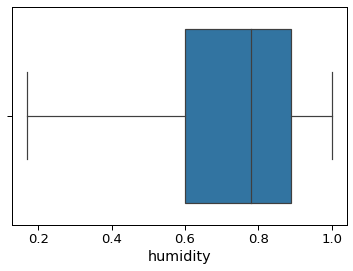

In [24]:
# fixing outliers
iqr, iqr_upper_bound, iqr_lower_bound, upper_replacement, lower_replacement = outlier_fix(df['humidity'])
df.loc[df['humidity'] > iqr_upper_bound, 'humidity'] = upper_replacement
df.loc[df['humidity'] < iqr_lower_bound, 'humidity'] = lower_replacement

# box plot after
sns.boxplot(x = 'humidity', data = df)

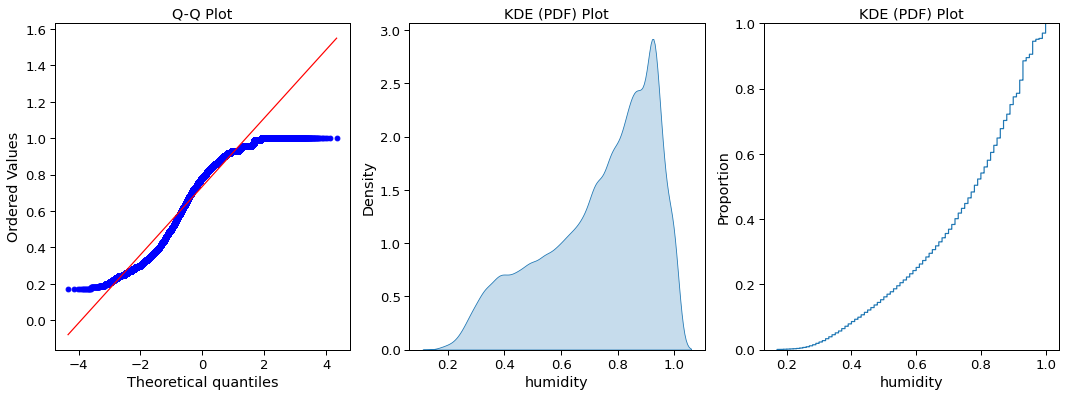

In [25]:
# humidity
prob_plots(df['humidity'])

- Since this is a left skewed (negative skewness) distribution, we will first have to reflect it into a right skewed distribution and then transform it.
- Also note that there are some values on the extreme that are very close, or equal, to each other. These often prove difficult to overcome to make our variable as normally distributed as possible.

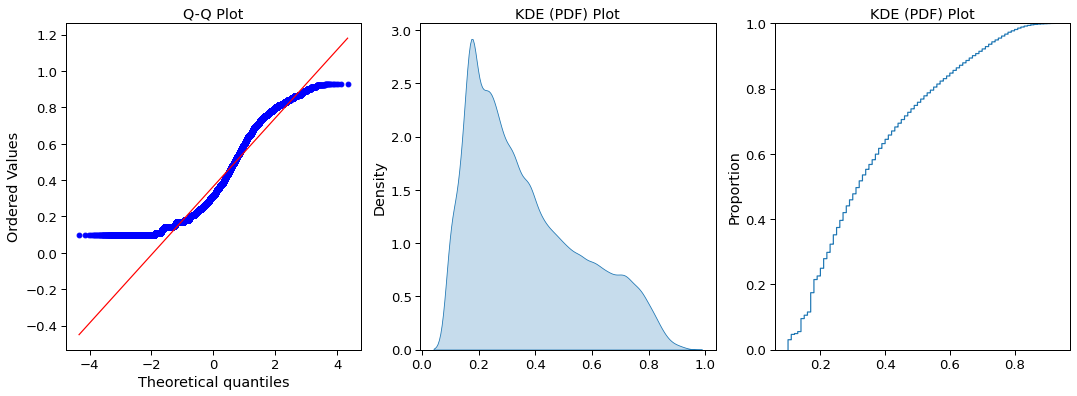

In [26]:
# reflecting using a factor of 0.01 to max(humidity)
humidity_reflected = np.array((df['humidity'].max() + 00.1) - df['humidity'])
prob_plots(humidity_reflected)

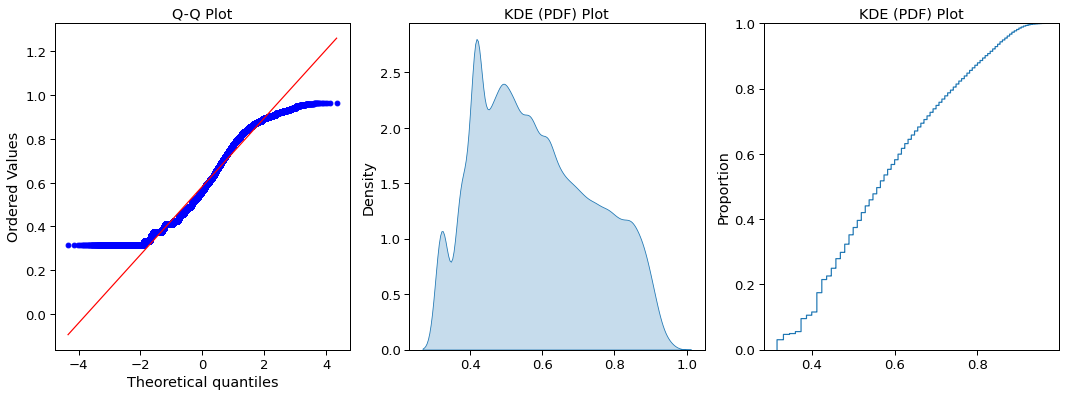

In [27]:
# square root transformation
prob_plots(np.sqrt(humidity_reflected))

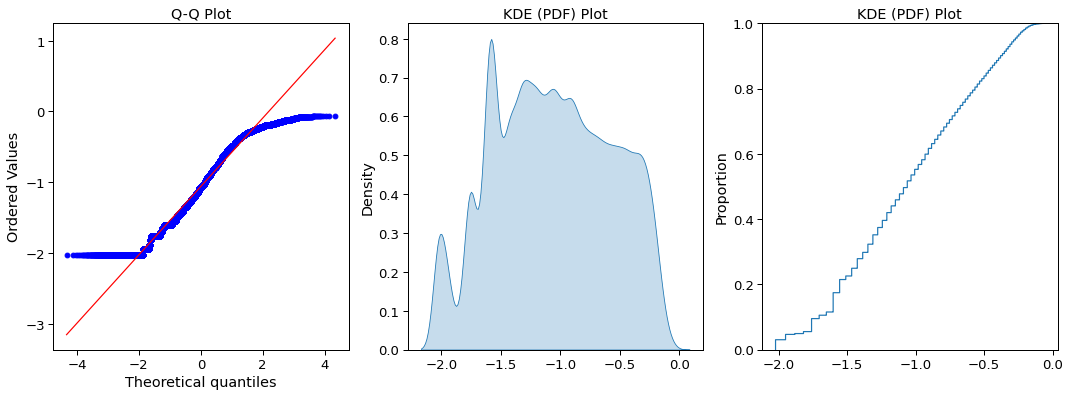

In [28]:
# box cox transformation
from scipy.stats import boxcox
xt, lambda_ = boxcox((humidity_reflected + 0.01))
lambda_
prob_plots(xt)

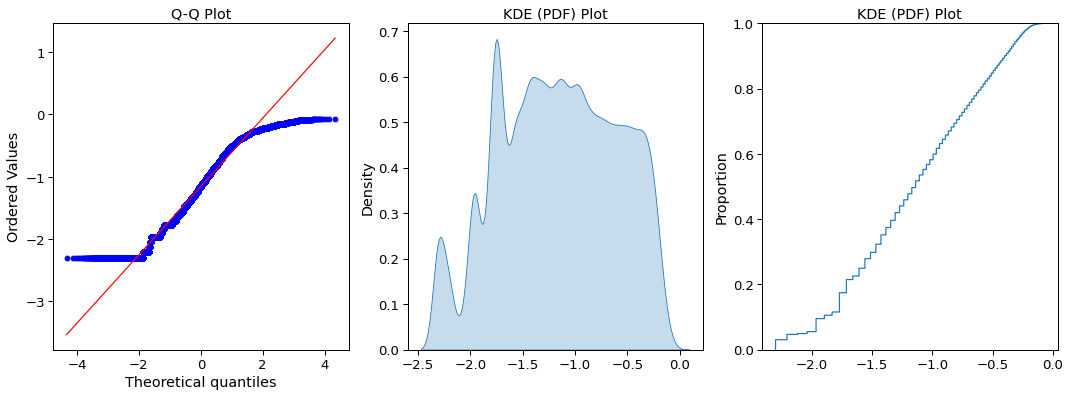

In [29]:
# log transformation
prob_plots(np.log(humidity_reflected))

We will move with a reflected log transformation.

In [30]:
df['humidity_refl_log'] = np.log(humidity_reflected)

In [31]:
df.drop(['time', 'humidity'], inplace=True, axis=1)
df.head()

,precipType,temperature,apparentTemperature,hour,humidity_refl_log
0,rain,9.472222,7.388889,0,-1.560648
1,rain,9.355556,7.227778,1,-1.427116
2,rain,9.377778,9.377778,2,-1.560648
3,rain,8.288889,5.944444,3,-1.309333
4,rain,8.755556,6.977778,4,-1.309333


## Linear Regression

### Create Dummy Variables

In [32]:
# create dummy variables
df = pd.get_dummies(df, prefix = ['precip', 'hour'])
df.head()

,temperature,apparentTemperature,humidity_refl_log,precip_None,precip_rain,precip_snow,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.472222,7.388889,-1.560648,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9.355556,7.227778,-1.427116,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9.377778,9.377778,-1.560648,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8.288889,5.944444,-1.309333,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8.755556,6.977778,-1.309333,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Train Test Split

In [33]:
# train test split
from sklearn.model_selection import train_test_split

X = df.drop('apparentTemperature', axis = 1)
y = df['apparentTemperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# add constants to X_train, X_test
import statsmodels.api as sm

X_train, X_test = sm.add_constant(X_train), sm.add_constant(X_test)

print('X_train =', X_train.shape)
print('X_test =', X_test.shape)
print('y_train =', y_train.shape)
print('y_test =', y_test.shape)

X_train = (67500, 30)
X_test = (28929, 30)
y_train = (67500,)
y_test = (28929,)


In [34]:
X_train.head()

,const,temperature,humidity_refl_log,precip_None,precip_rain,precip_snow,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
74674,1.0,22.800000,-0.274437,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
11092,1.0,6.761111,-1.609438,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3761,1.0,30.838889,-0.314711,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
72922,1.0,-0.138889,-0.967584,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
18911,1.0,18.138889,-1.108663,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Building the Model

In [35]:
# build the LR model
lm = sm.OLS(y_train, X_train).fit()

In [36]:
# interpret the result
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     apparentTemperature   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                 1.623e+05
Date:                 Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                         23:09:07   Log-Likelihood:            -1.1431e+05
No. Observations:                67500   AIC:                         2.287e+05
Df Residuals:                    67472   BIC:                         2.289e+05
Df Model:                           27                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4393      0.022   -111.512      0.000      -2.482      -2.396
temperature           1.1343      0.001   1450.423      0.000       1.133       1.136
humidity_refl_log    -0.6438      0.013    -50.882      0.000      -0.669      -0.619
precip_None          -0.4750      0.051     -9.276      0.000      -0.575      -0.375
precip_rain          -0.8689      0.020    -44.107      0.000      -0.908      -0.830
precip_snow          -1.0954      0.022    -50.641      0.000      -1.138      -1.053
hour_0                0.0033      0.024      0.134      0.893      -0.044       0.051
hour_1                0.0867      0.025      3.533      0.000       0.039       0.135
hour_2                0.0308      0.024      1.257      0.209      -0.017       0.079
hour_3                0.0084      0.025      0.342      0.732      -0.040       0.057
hour_4               -0.0308      0.025     -1.252      0.210      -0.079       0.017
hour_5               -0.0129      0.025     -0.520      0.603      -0.061       0.036
hour_6               -0.0708      0.025     -2.850      0.004      -0.119      -0.022
hour_7               -0.0657      0.025     -2.663      0.008      -0.114      -0.017
hour_8               -0.1243      0.024     -5.102      0.000      -0.172      -0.077
hour_9               -0.1780      0.024     -7.284      0.000      -0.226      -0.130
hour_10              -0.1826      0.024     -7.490      0.000      -0.230      -0.135
hour_11              -0.1858      0.024     -7.598      0.000      -0.234      -0.138
hour_12              -0.2212      0.025     -9.014      0.000      -0.269      -0.173
hour_13              -0.2534      0.025    -10.325      0.000      -0.302      -0.205
hour_14              -0.2732      0.025    -11.072      0.000      -0.322      -0.225
hour_15              -0.2771      0.025    -11.230      0.000      -0.325      -0.229
hour_16              -0.2439      0.024     -9.968      0.000      -0.292      -0.196
hour_17              -0.2003      0.025     -8.137      0.000      -0.249      -0.152
hour_18              -0.1551      0.025     -6.310      0.000      -0.203      -0.107
hour_19              -0.0636      0.024     -2.597      0.009      -0.112      -0.016
hour_20              -0.0094      0.024     -0.388      0.698      -0.057       0.038
hour_21              -0.0127      0.024     -0.525      0.600      -0.060       0.035
hour_22              -0.0195      0.024     -0.802      0.423      -0.067       0.028
hour_23               0.0117      0.024      0.480      0.631      -0.036       0.060
==============================================================================
Omnibus:                    32204.401   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1401101.8

#### Model Summary Statistics - 

1. Model has an `Adjusted R Squared = 0.985`. This indicates that the model might be a great fit for the given data.
2. A high, and sifgnificant, F-statistic also indicates that our model is better than a model that would use only the intercept.
3. 

### Validating Assumptions

In [37]:
# function to get residuals
def get_residuals(model, X, y):
    y_predicted = lm.predict(X_train)
    y_actual = y_train
    residuals = y_predicted - y_actual
    return residuals

In [38]:
# 1. Residual Mean is 0
residuals = get_residuals(lm, X_train, y_train)
residuals.mean()

1.0327228126159214e-13

Text(0, 0.5, 'residuals')

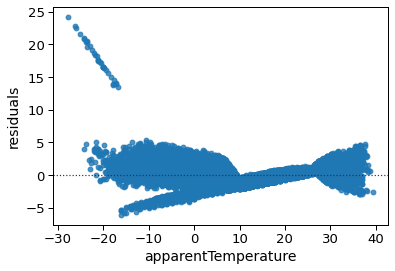

In [39]:
# 2. Homoscedasticity - Residuals have a constant variance
p = sns.residplot(y = residuals, x = y_train)
p.set_xlabel("apparentTemperature", fontsize = 14)
p.set_ylabel("residuals", fontsize = 14)

((array([-4.25896471, -4.05632172, -3.94595949, ...,  3.94595949,
          4.05632172,  4.25896471]),
  array([-5.61780498, -5.44570534, -5.36193993, ..., 23.00699757,
         23.35483671, 24.77391515])),
 (1.268447497488982, 1.0386026628387374e-13, 0.9638460105316455))

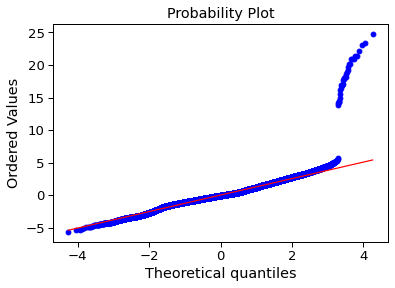

In [40]:
# 3. Residuals are normally distributed
from scipy.stats import probplot
probplot(residuals, plot = plt)

### Cross Validation

In [41]:
# K Fold CV with K=5
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5)

fold = 1
cv_df = pd.DataFrame(columns = ['Fold', 'MSE', 'RMSE'])
# split the training further into train and test
for train_index, test_index in kf.split(X_train):    
    cv_train_x = X_train.iloc[train_index,]
    cv_train_y = y_train.iloc[train_index,]
    
    cv_test_x = X_train.iloc[test_index,]
    cv_test_y = y_train.iloc[test_index,]
    
    # build the model on the CV training data and predict on CV testing data
    cv_lm = sm.OLS(cv_train_y, cv_train_x).fit()
    cv_prdct = cv_lm.predict(cv_test_x)
    
    # mean square error
    cv_mse = np.mean((cv_prdct - cv_test_y)**2)
    cv_df.loc[len(cv_df)] = [fold, cv_mse, np.sqrt(cv_mse)]
    
    fold+=1

cv_df['Ave MSE'] = cv_df['MSE'].mean()
cv_df['Ave RMSE'] = cv_df['RMSE'].mean()
cv_df['MSE Diff'] = cv_df['MSE'] - cv_df['Ave MSE']
cv_df['RMSE Diff'] = cv_df['RMSE'] - cv_df['Ave RMSE']
    
cv_df = cv_df.iloc[:, [0,1,3,5,2,4,6]]  # rearranging
cv_df

,Fold,MSE,Ave MSE,MSE Diff,RMSE,Ave RMSE,RMSE Diff
0,1.0,1.708226,1.733343,-0.025117,1.306991,1.316341,-0.009350
1,2.0,1.639425,1.733343,-0.093919,1.280400,1.316341,-0.035941
2,3.0,1.721177,1.733343,-0.012167,1.311936,1.316341,-0.004405
3,4.0,1.832326,1.733343,0.098982,1.353634,1.316341,0.037293
4,5.0,1.765564,1.733343,0.032221,1.328745,1.316341,0.012404


Getting a consistently good KFold CV results, we will move ahead with our model.

### Model Performance Parameter (MSE, RMSE)

In [42]:
# mse
mse_train = np.mean((lm.predict(X_train) - y_train)**2)
mse_test = np.mean((lm.predict(X_test) - y_test)**2)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("Model MSE, RMSE for training dataset =", format(mse_train, '.2f'), ",", format(rmse_train, '.2f'))
print("Model MSE, RMSE for testing dataset =", format(mse_test, '.2f'), ",", format(rmse_test, '.2f'))
print("Comparing this with average of predicted values =", format(df['apparentTemperature'].mean(), '.2f'))

Model MSE, RMSE for training dataset = 1.73 , 1.32
Model MSE, RMSE for testing dataset = 1.67 , 1.29
Comparing this with average of predicted values = 10.85


### Comparing Predictions

In [43]:
# predictions vs actuals
predictions = lm.predict(X_test)

# comparing 
## generate DF
df_test_output = pd.concat([X_test, y_test], axis = 1)
df_test_output['predicted_apparentTemperature'] = predictions

## restore dummies tocategorical
df_test_output['precip'] = df_test_output.loc[:, ['precip_None', 'precip_rain', 'precip_snow']].idxmax(axis=1)
df_test_output['precip'] = df_test_output['precip'].apply(lambda e : e.replace('precip_', ''))
df_test_output.drop(['precip_None', 'precip_rain', 'precip_snow'], axis=1, inplace = True)

df_test_output['hour'] = df_test_output.loc[:, df_test_output.filter(like = 'hour_').columns].idxmax(axis=1)
df_test_output['hour'] = df_test_output['hour'].apply(lambda e : e.replace('hour_', ''))
df_test_output.drop(df_test_output.filter(like = 'hour_').columns, axis=1, inplace = True)

# rearranging columns
df_test_output = df_test_output.iloc[:, [1,2,5,6,3,4]]

df_test_output.head(20)

,temperature,humidity_refl_log,precip,hour,apparentTemperature,predicted_apparentTemperature
25072,10.055556,-1.272966,rain,17,10.055556,8.716586
76991,-0.366667,-1.966113,snow,3,-0.366667,-2.676327
22153,17.688889,-1.609438,rain,1,17.688889,17.878319
38576,-9.150000,-1.386294,snow,8,-9.150000,-13.144823
82949,27.122222,-0.494296,rain,8,27.461111,27.649217
76329,27.777778,-0.328504,rain,13,27.344444,28.156889
76376,25.072222,-0.579818,rain,12,25.072222,25.282156
1413,17.222222,-1.771957,rain,21,17.222222,17.354222
62787,17.388889,-1.309333,rain,3,17.388889,17.266567
57802,7.116667,-0.415515,rain,10,3.494444,4.848762
